# TP Statistiques
(Analyse de la base de données “investment data”) La lecture d’un tutoriel pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html. Nous travaillons sur la base de données Investment Data Set1 qui peut être téléchargée depuis https://bitbucket.org/portierf/shared_files/downloads/invest.txt. Avant de commencer, on réalisera l’exercice 12 du polycopié : ”explicit formulas when p “ 1 for prediction intervals", se trouvant dans le chapitre 3 : “Confidence intervals and hypothesis testing”. On pourra aussi lire la section 3.1.1 de ce même chapitre du polycopié.

# Question 1
Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table conte- nant les 5 premières observations.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib notebook
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# On charge les données dans un DataFrame "df" à partir du fichier csv
url = 'https://bitbucket.org/portierf/shared_files/downloads/invest.txt'
df = pd.read_csv(url, sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [67]:
# On affiche les informations statistiques pour mieux connaître le dataset
df.describe()

,year,gnp,invest,cpi,interest
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667
std,4.472136,738.145808,117.582691,40.286606,2.812245
min,1968.000000,873.400000,133.300000,82.540000,4.500000
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000
max,1982.000000,3057.500000,471.500000,207.230000,13.420000


## Question 2

Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

<IPython.core.display.Javascript object>


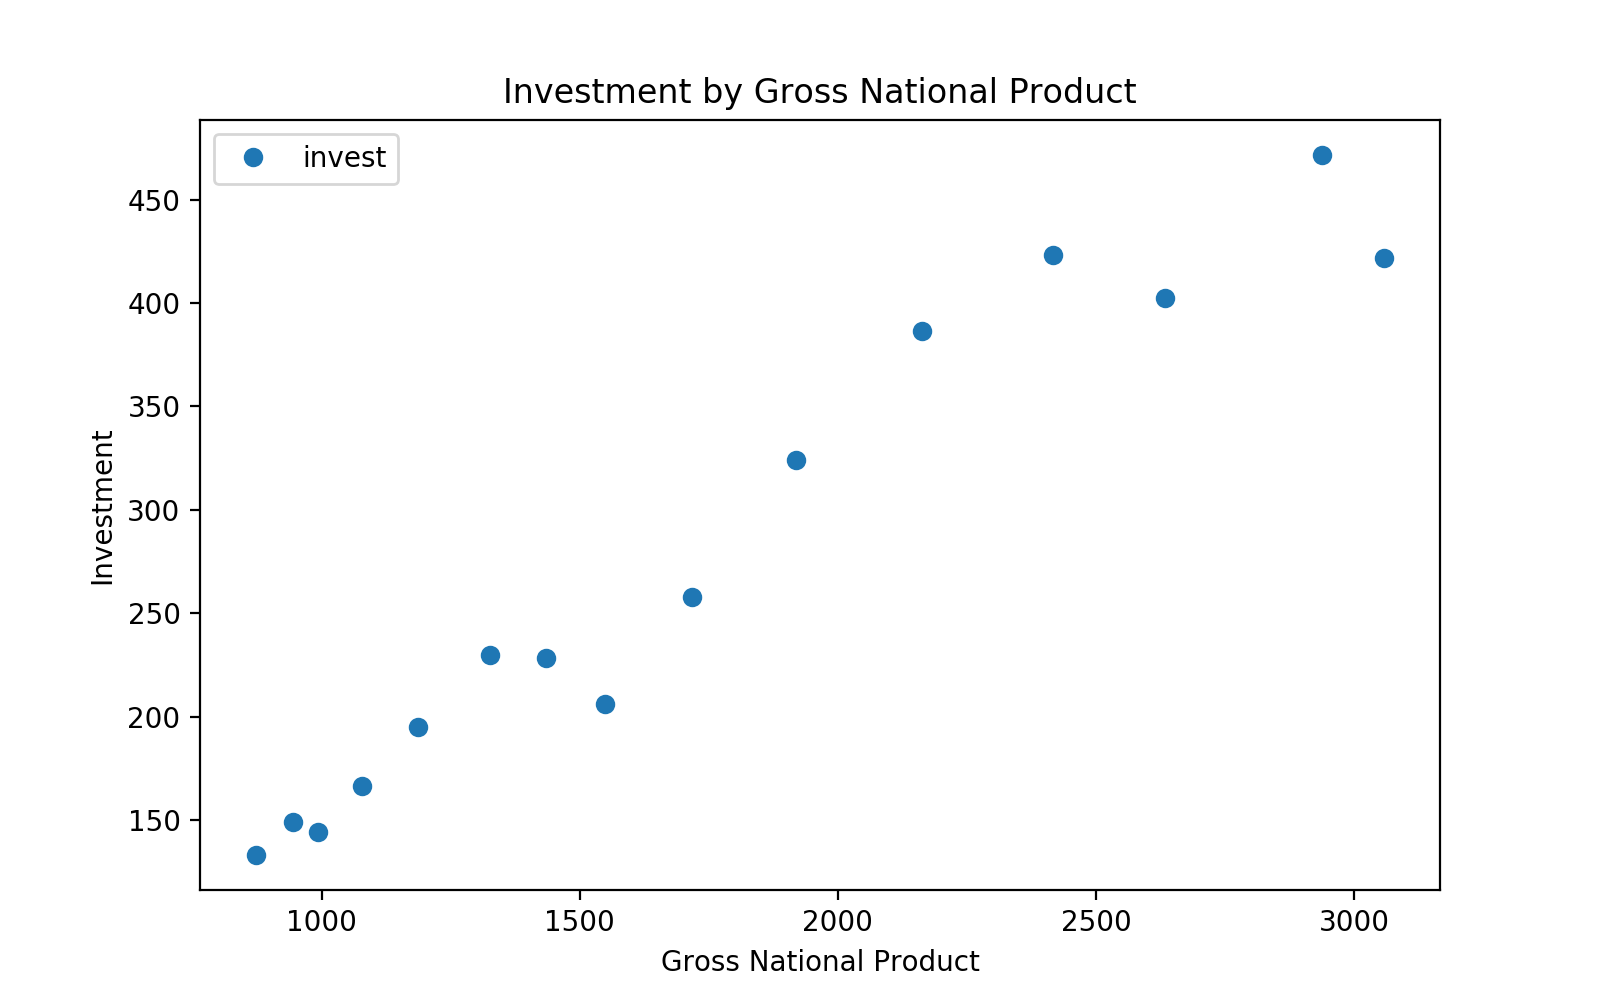

In [68]:
# On instancie le traceur plt, avec les axes et on trace avec les données
# contenue dans les colonnes correspondantes du DataFrame df
plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

plt.plot(df['gnp'], df['invest'], "o")
plt.title("Investment by Gross National Product")
plt.legend()
plt.show()

## Question 3

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté **Beta**.

<IPython.core.display.Javascript object>


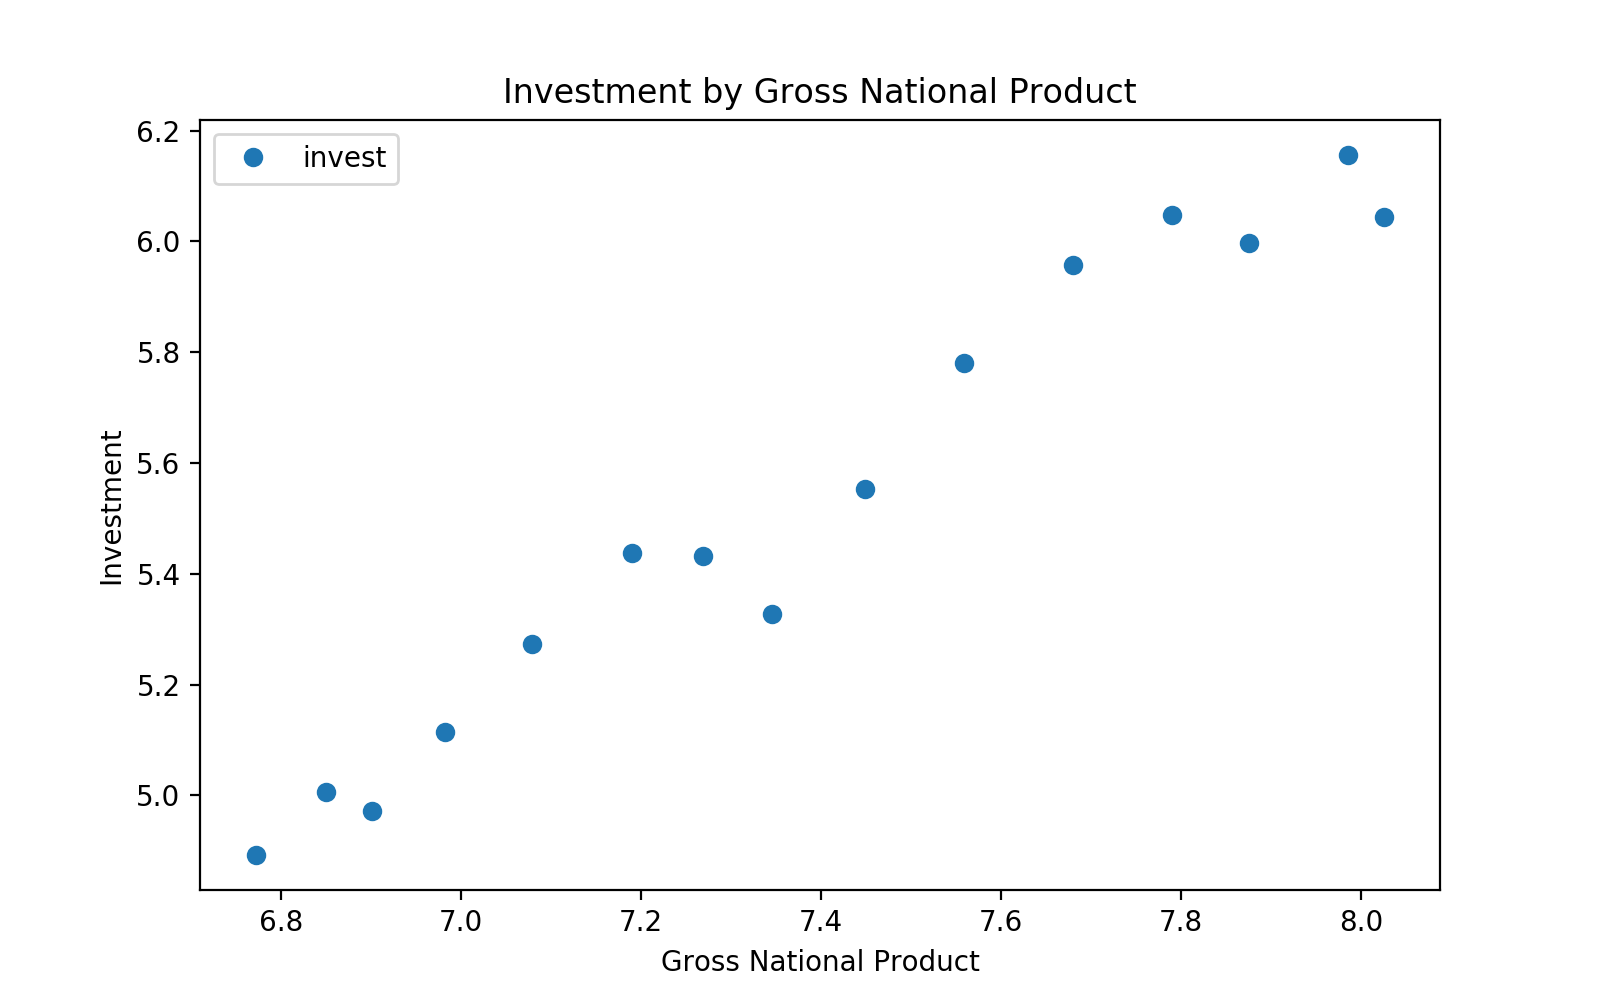

In [69]:
# On transforme les données des colonnes gnp et invest en leur appliquant la fonction log
X_log = df['gnp'].apply(np.log)
Y_log = df['invest'].apply(np.log)

# On trace le graphique correspondant pour vérifier l'allure des données
plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

plt.plot(X_log, Y_log, "o")
plt.title("Investment by Gross National Product")
plt.legend()
plt.show()

Beta0 = -1.963591 EcartTypeBeta0 = 0.409547
Beta1 = 1.015281 EcartTypeBeta1 = 0.055383
Coefficient R2 = 0.962757


<IPython.core.display.Javascript object>


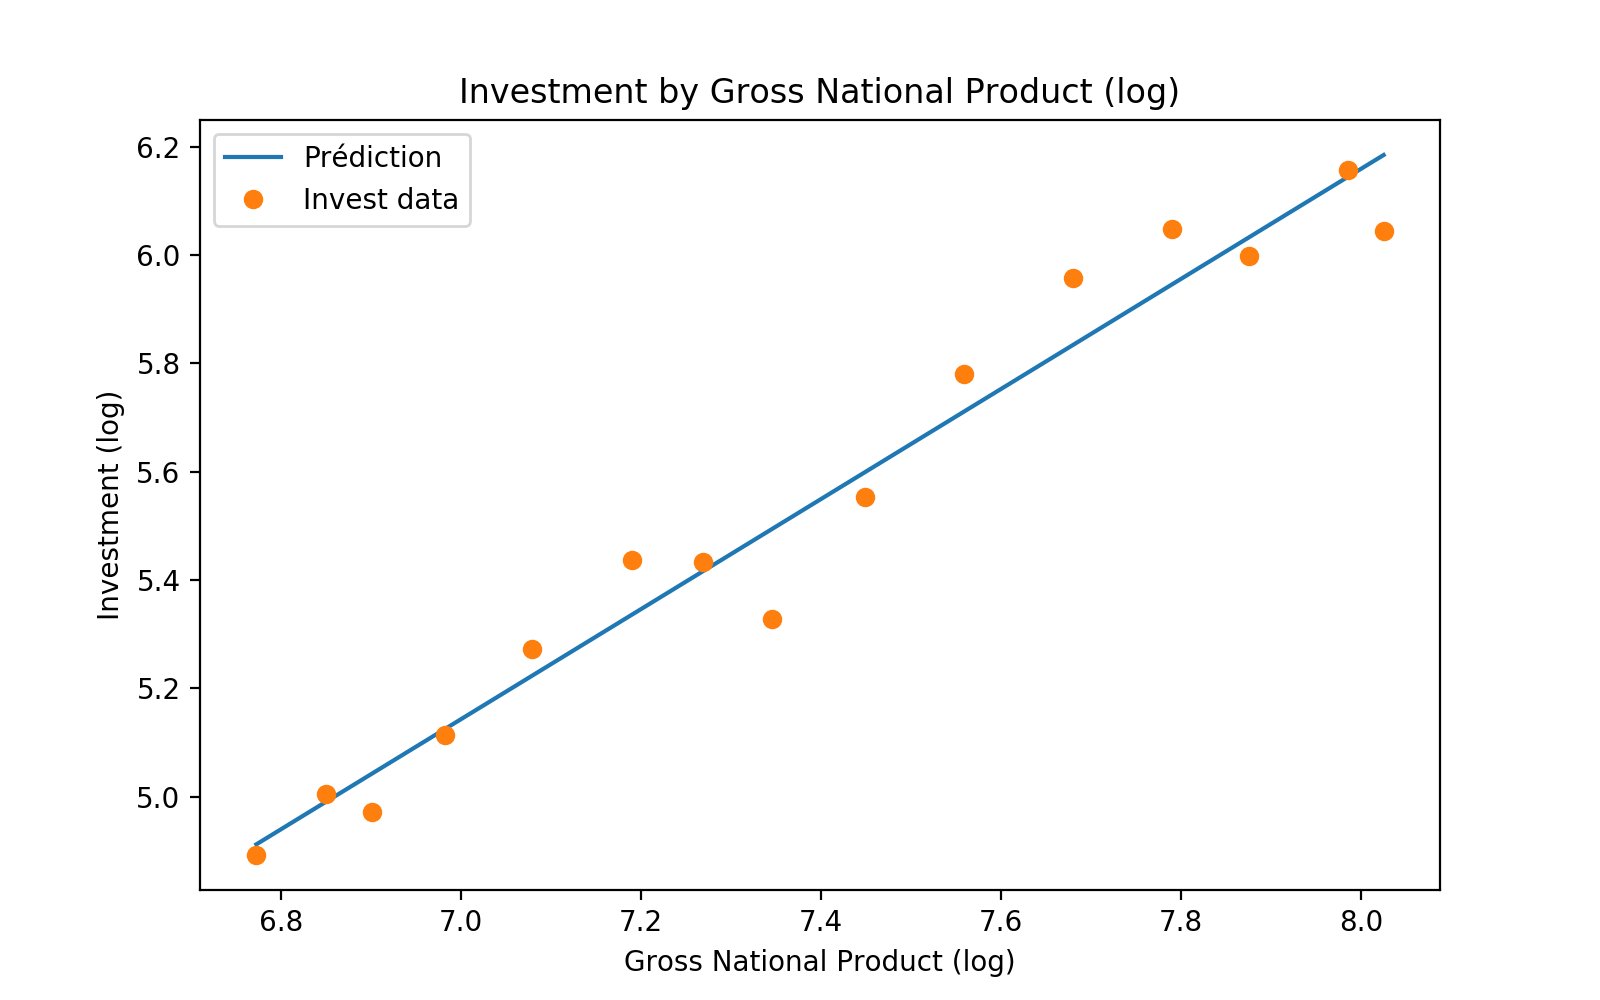

In [77]:
# Calcul des moyennes
Y_mean = Y_log.mean()
X_mean = X_log.mean()

# Calcul des Beta, Beta0 étant l'intercept et Beta1 la pente
Beta1 = (X_log - X_mean).T.dot(Y_log - Y_mean) / np.sum((X_log - X_mean)**2)
Beta0 = Y_mean - Beta1 * X_mean

# N représente la taille de l'échantillon
N = df['gnp'].count()

# Calcul de l'estimateur de la variance
SigmaSquare = (1 / (N - 2) ) * np.sum((Y_log - (Beta0 + Beta1 * X_log))**2)

# Calcul des écarts-types
VarBeta0 = SigmaSquare *(1/N + X_mean**2 /np.sum((X_log - X_mean)**2))
EcartTypeBeta0 = np.sqrt(VarBeta0)

VarBeta1 = SigmaSquare / (N * X_var)
EcartTypeBeta1 = np.sqrt(VarBeta1)

# Coéficient de détermination (attention : formule sans le "1 -")
R2 = np.sum((Beta0 + Beta1 * X_log - Y_mean)**2) / np.sum((Y_log - Y_mean)**2)

print("Beta0 = {:f} EcartTypeBeta0 = {:f}".format(Beta0,EcartTypeBeta0))
print("Beta1 = {:f} EcartTypeBeta1 = {:f}".format(Beta1,EcartTypeBeta1))
print("Coefficient R2 = {:f}".format(R2))

plt.figure(figsize=(8,5))
plt.plot(X_log, X_log * Beta1 + Beta0, label='Prédiction')
plt.plot(X_log, Y_log, "o", label='Invest data')
plt.title("Investment by Gross National Product (log)")
plt.xlabel('Gross National Product (log)')
plt.ylabel('Investment (log)')
plt.legend()
plt.show()

## Question 4
La pente estimée précédemment est-elle statistiquement significative? On fera un test de student (t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

In [81]:
# On calcule la statistique de test T1 = (Beta1 - 0) / (Ecartype de Beta1)
# on fait l'hypothèse de Beta1vrai = 0 pour voir si Beta1 est significatif
T1 = Beta1 / EcartTypeBeta1

# On calcule ensuite la p-valeur correspondante avec la fonction de répartition
# de la loi de Student pour 1-alpha/2 et N - 2 = 13 degrés de libertés
Pvaleur1 = (1 - stats.t.cdf(np.abs(T1),N - 2)) * 2

print("Statistique de test : {:f}".format(T1))
print("P-valeur : {}".format(Pvaleur1))

Statistique de test : 18.331984
P-valeur : 1.1363709973011282e-10


### Interprétation
On constate que la p-valeur de la statistique est très petite, ce qui revient à rejeter l'hypotèse de nullité pour le coefficient Beta1. Ce dernier est donc statistiquement significatif.

## Question 5
Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à ex- pliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CIpxq et PIpxq, respectivement (avec les notations du polycopié, x “ p1, 1000qT ).

In [83]:
# Prédiction pour GNP = 1000
X_new = 1000
X_new_log = np.log(X_new)
YPred_log = Beta0 + Beta1 * X_new_log
print("Prédiction log : GNP = {:f}, prédiction = {:f}".format(X_new_log,YPred_log))
print("Prédiction origine : GNP = 1000, prédiction = {:f}".format(np.exp(YPred_log )))

Prédiction log : GNP = 6.907755, prédiction = 5.049724
Prédiction origine : GNP = 1000, prédiction = 155.979428


In [86]:
# On calcule d'abord la variance d'Y chapeau (var_Yhat) pour pouvoir
# calculer les bornes des écarts-types en utilisant les variables calculées
# précédemment, ex. SigmaSquare, YPred_log

# Calcul du quantile de Student au niveau 90%, c'est à dire alpha = 0.1
alpha = 0.1
QuantStudent = stats.t.ppf(1 - alpha/2,N-2)

# Calcul des bornes de l'intervalle de confiance CI
var_Yhat = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((X_new_log - X_mean)**2) /np.sum((X_log - X_mean)**2))
BorneInf_CI = YPred_log - var_Yhat * QuantStudent
BorneSup_CI = YPred_log + var_Yhat * QuantStudent

print("Intervalle de confiance : [{:f}, {:f}]".format(BorneInf_CI,BorneSup_CI))

# Calcul des bornes de l'intervalle de prédiction PI
var_Y_Aexpliquer = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((X_new_log - X_mean)**2) /np.sum((X_log - X_mean)**2))
BorneInf_PI = YPred_log - var_Y_Aexpliquer * QuantStudent
BorneSup_PI = YPred_log + var_Y_Aexpliquer * QuantStudent

print("Intervalle de prédiction : [{:f}, {:f}]".format(BorneInf_PI,BorneSup_PI))

Intervalle de confiance : [4.988223, 5.111225]
Intervalle de prédiction : [4.882820, 5.216628]


## Question 6
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

In [88]:
# On ajoute les 2 colonnes au DataFrame correspondant aux valeurs log
# et on réordonne les colonnes pour un affichage lisible
df['gnp_log'] = X_log
df['invest_log'] = Y_log
df = df[['year','gnp','invest','gnp_log', 'invest_log', 'cpi', 'interest']]

### Explications
On créé 4 fonctions qui, pour une valeur de X donnée, vont calculer respectivement la borne inférieure et la borne supérieure de l'intervalle de confiance, puis la borne inférieure et la borne supérieure de l'intervalle de prédiction. Par la suite on va appliquer ces fonctions sur toute la colonne "gnp_log" pour créer les colonnes du DataFrame correspondant aux bornes des intervalles. On affiche ensuite le DataFrame pour avoir une vision globale.

In [89]:
def calculate_borne_inf_CI(x):
    y = Beta0 + Beta1 * x
    varpred = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y - varpred * QuantStudent

def calculate_borne_sup_CI(x):
    y = Beta0 + Beta1 * x
    varpred = np.sqrt(SigmaSquare) * np.sqrt( 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y + varpred * QuantStudent

df['prédiction'] = Beta0 + Beta1 * X_log
df['CI_Inf'] = calculate_borne_inf_CI(df['gnp_log'])
df['CI_Sup'] = calculate_borne_sup_CI(df['gnp_log'])

In [90]:
def calculate_borne_inf_PI(x):
    y = Beta0 + Beta1 * x
    varexp = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y - varexp * QuantStudent

def calculate_borne_sup_PI(x):
    y = Beta0 + Beta1 * x
    varexp = np.sqrt(SigmaSquare) * np.sqrt(1 + 1/N + ((x - X_mean)**2) /np.sum((X_log - X_mean)**2))
    return y + varexp * QuantStudent

df['PI_Inf'] = calculate_borne_inf_PI(df['gnp_log'])
df['PI_Sup'] = calculate_borne_sup_PI(df['gnp_log'])
df

,year,gnp,invest,gnp_log,invest_log,cpi,interest,prédiction,CI_Inf,CI_Sup,PI_Inf,PI_Sup
0,1968,873.4,133.3,6.772394,4.892602,82.54,5.16,4.912294,4.840199,4.984389,4.741203,5.083385
1,1969,944.0,149.3,6.850126,5.005958,86.79,5.87,4.991214,4.925322,5.057107,4.822643,5.159786
2,1970,992.7,144.2,6.900429,4.971201,91.45,5.95,5.042285,4.980237,5.104334,4.875179,5.209392
3,1971,1077.6,166.4,6.982492,5.114395,96.01,4.88,5.125603,5.069459,5.181746,4.960598,5.290607
4,1972,1185.9,195.0,7.078257,5.273000,100.00,4.50,5.222832,5.172818,5.272845,5.059810,5.385853
5,1973,1326.4,229.8,7.190224,5.437209,105.75,6.44,5.336509,5.292188,5.380831,5.175143,5.497875
6,1974,1434.2,228.7,7.268362,5.432411,115.08,7.83,5.415842,5.374218,5.457466,5.255196,5.576488
7,1975,1549.2,206.1,7.345494,5.328361,125.79,6.25,5.494152,5.453917,5.534387,5.333860,5.654444
8,1976,1718.0,257.9,7.448916,5.552572,132.34,5.50,5.599155,5.558582,5.639727,5.438778,5.759531
9,1977,1918.3,324.1,7.559195,5.781052,140.05,5.46,5.711118,5.667508,5.754729,5.549946,5.872290


### Notes
Pour l'affichage du graphique suivant, j'ai considéré que les valeurs étaient déja logarithmiques et que repasser toutes les valeurs en exponentielles n'apportaient pas d'informations supplémentaires par rapport aux tracés en valeurs logarithmiques, si ce n'est d'utiliser les fonction Xscale('log') et Yscale('log')... La formulation de la question était un peu ambiguë je trouve.

<IPython.core.display.Javascript object>


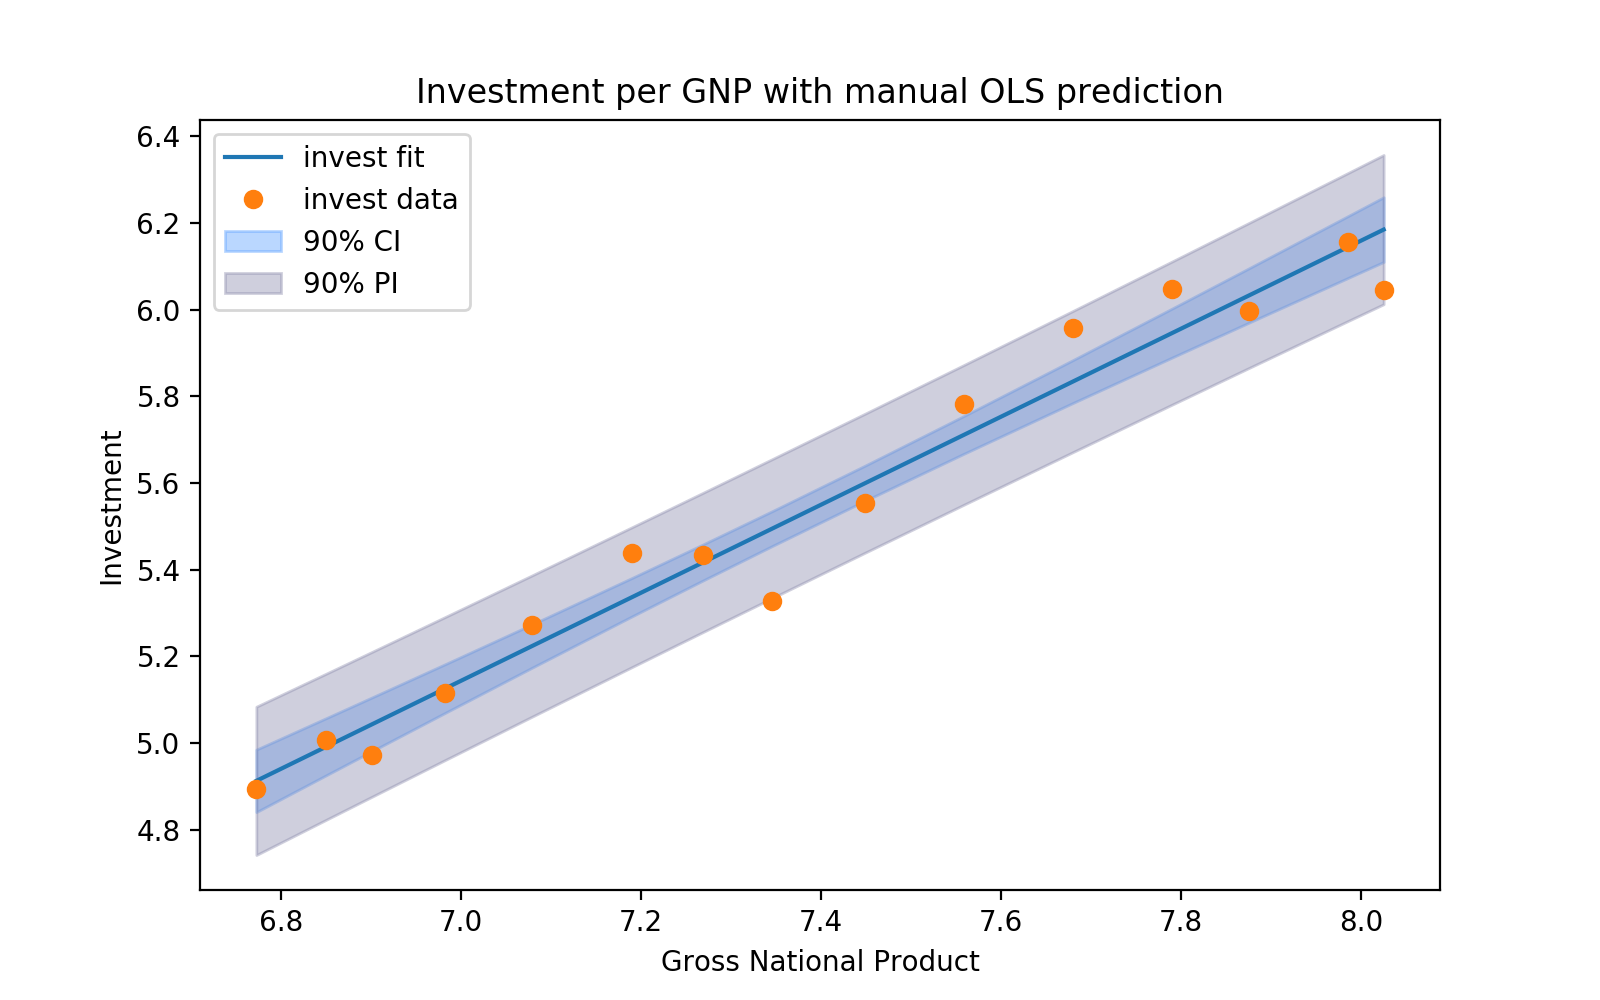

In [91]:
# On affiche enfin le graphe avec toutes ses composantes :
# -Les données fournies 'Invest data'
# -La droite de regression avec les prédictions
# -Les zones correspondant aux intervalles de confiance et de prédiction

plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.plot(X_log, X_log * Beta1 + Beta0, label='invest fit')
plt.plot(X_log, Y_log, "o", label='invest data')
plt.fill_between(X_log, df['CI_Inf'], df['CI_Sup'], color = '#539cff', alpha = 0.4, label = '90% CI')
plt.fill_between(X_log, df['PI_Inf'], df['PI_Sup'], color = '#8888aa', alpha = 0.4, label = '90% PI')
plt.title("Investment per GNP with manual OLS prediction")
plt.legend()

## Question 7
En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de dé- termination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [94]:
# On utilise la library Scikit-learn pour faire une regression standard
regr = linear_model.LinearRegression()
regr.fit(df[['gnp_log']],Y_log)
Beta0Sklearn = regr.intercept_
Beta1Sklearn = regr.coef_[0]
print("Coefficients Beta avec ScikitLearn : Beta0 = {:f}, Beta1 = {:f}".format(Beta0Sklearn,Beta1Sklearn))
print("Coefficients Beta calculés manuelement : Beta0 = {:f}, Beta1 = {:f}".format(Beta0,Beta1))

# Ici j'ai utilisé la fonction np.isclose(),mais l'affichage montre directement que les valeurs sont identiques
print("Les Beta0 sont-ils proches ? {}".format(np.isclose(Beta0, Beta0Sklearn)))
print("Les Beta1 sont-ils proches ? {}\n".format(np.isclose(Beta1, Beta1Sklearn)))

# La variable X_new_log sera utilisée pour la valeur de log(1000)
X_new_log = np.log(1000)

# On utilise la fonction predict sur la valeur à tester
InvestPred_Gnp1000 = np.exp(regr.predict([[X_new_log]]))[0]

print("Prédition SciKitLearn pour GNP = 1000 : {:f}".format(InvestPred_Gnp1000))
print("Prédiction manuelle pour GNP = 1000 : {:f}".format(np.exp(YPred_log)))
print("Les prédictions sont-elles proches ? {}".format(np.isclose(np.exp(YPred_log),InvestPred_Gnp1000)))

Coefficients Beta avec ScikitLearn : Beta0 = -1.963591, Beta1 = 1.015281
Coefficients Beta calculés manuelement : Beta0 = -1.963591, Beta1 = 1.015281
Les Beta0 sont-ils proches ? True
Les Beta1 sont-ils proches ? True

Prédition SciKitLearn pour GNP = 1000 : 155.979428
Prédiction manuelle pour GNP = 1000 : 155.979428
Les prédictions sont-elles proches ? True


In [97]:
# Prédictions Sklearn sur toutes les données X du DataFrame
Y_pred_Sklearn = regr.predict(pd.DataFrame(X_log))

# Calcul du R2 de Sklearn
R2_Sklearn = r2_score(y_pred = Y_pred_Sklearn, y_true = Y_log)

print("Coefficient R2 de SciKitLearn = {:f} \nCoefficient R2 manuel = {:f} ".format(R2_Sklearn, R2))

Coefficient R2 de SciKitLearn = 0.962757 
Coefficient R2 manuel = 0.962757 


### Interprétation
Les calculs avec Scikit-Learn donnent rigoureusement les mêmes réponses sur tous les calculs, ce qui est cohérent !

## Question 8
Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

### Notes
Pour l'affichage du graphique suivant, j'ai considéré que les valeurs étaient déja logarithmiques et que repasser toutes les valeurs en exponentielles n'apportaient pas d'informations supplémentaires par rapport aux tracés en valeurs logarithmiques. La formulation de la question était un peu ambiguë je trouve.

<IPython.core.display.Javascript object>


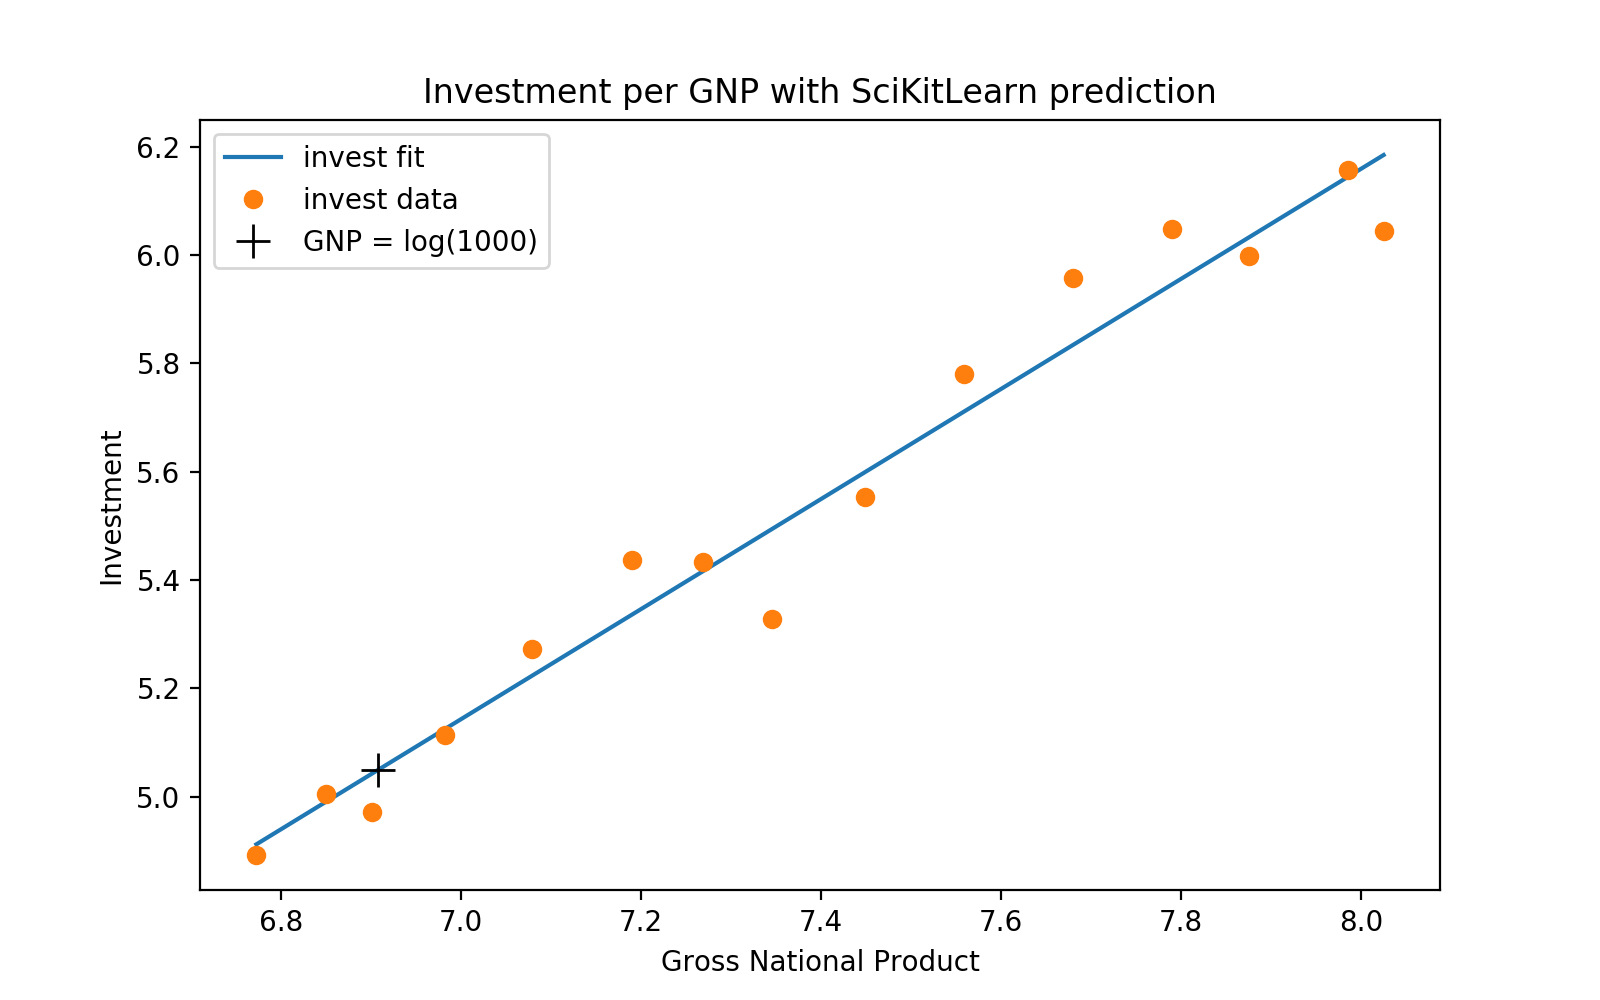

In [98]:
plt.figure(figsize=(8,5))
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.plot(X_log, Beta0Sklearn + X_log * Beta1Sklearn, label='invest fit')

plt.plot(X_log, Y_log, "o", label='invest data')
plt.plot(X_new_log, np.log(InvestPred_Gnp1000), "+", markersize=12, color='black', label ="GNP = log(1000)")
plt.title("Investment per GNP with SciKitLearn prediction")
plt.legend()

## Deuxième partie - multidimensionnel
**Note** : On introduit une nouvelle variable explicative, la variable interest (sans transformation loga- rithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opéra- tions élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

## Question 9
Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de rang plein ?

In [99]:
# On insère une colonne de 1 dans le DataFrame
df.insert(0,'ones',np.ones(X_log.size))

# On construit la matrice X "matX" (c'est un dataFrame ici)
matX = pd.concat([df['ones'],df['gnp_log'],df['interest']], axis=1 )

#On construit la matrice de Gram et on l'affiche
matGram = matX.T.dot(matX)
matGram

,ones,gnp_log,interest
ones,15.000000,110.752821,111.790000
gnp_log,110.752821,820.248477,839.188543
interest,111.790000,839.188543,943.855700


In [104]:
# Pour le calcul du rang on peut soit appeler la fonction matrix_rank directement
# ou bien calculer les valeurs propres et vérifier celles qui ne sont pas nulles
# Dans les 2 cas le résultat est le même !

# Calcul des valeurs propres
val_propres = np.linalg.eigvals(matGram)
print("Valeurs propres de MatGram : {}".format(val_propres))
print("Nb valeurs propres non nulles : %d" % np.sum(val_propres != 0))
print("Rang avec la fonction de numpy = {:d}\n".format(np.linalg.matrix_rank(matGram)))
print("La matrice est de rang plein, c'est à dire de rang 3")

Valeurs propres de MatGram : [1.73787190e+03 1.82369697e-02 4.12140362e+01]
Nb valeurs propres non nulles : 3
Rang avec la fonction de numpy = 3

La matrice est de rang plein, c'est à dire de rang 3


## Question 10
Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart- types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.

### Notes
Ici on passe en calcul vectoriel :  ainsi les 3 coefficients Beta sont stockés dans le vecteur Beta. De même le calcul des 3 écarts-types peut se faire directement de façon vectorielle en utilisant la fonction np.diag sur la matrice de Gram. L'opérateur "*" de python est utilisé pour accéder individuellement à chaque enregistrement d'un tableau.

In [106]:
# On calcule l'inverse de la matrice de Gram calcul précédemment
matGramInv = np.linalg.inv(matGram)

# On calcule les coefficients dans le vecteur Beta
Beta = matGramInv.dot(matX.T).dot(Y_log)
print("Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(*Beta))

# Calcul de l'estimateur de la variance du bruit
Sigma2 = (1 / (N - 3)) * np.sum((Y_log - matX.dot(Beta))**2)

# Ecartypes des Beta
EcartTypeBeta = np.sqrt(Sigma2 * np.diag(matGramInv))
print("écarts-types : Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(*EcartTypeBeta))

# Calcul de R2
R2 = np.sum((matX.dot(Beta) - Y_mean)**2) / np.sum((Y_log - Y_mean)**2)
print("Coefficient R2 = {:f}".format(R2))

Beta0 = -2.180455 Beta1 = 1.051243 Beta2 = -0.006529
écarts-types : Beta0 = 0.662399 Beta1 = 0.102061 Beta2 = 0.015344
Coefficient R2 = 0.963311


In [108]:
# Test de Student pour la significativité des Beta. Au lieu de calculer chaque
# valeur séparément, on préfère le calcul vectoriel ci-après, comme expliqué dans la note.
# T0 = Beta[0] / EcartTypeBeta[0]
# T1 = Beta[1] / EcartTypeBeta[1]
# T2 = Beta[2] / EcartTypeBeta[2]

# Calcul vectoriel des statistiques pour chaque coefficient
T = Beta / EcartTypeBeta
print("Statistiques de test : T0 = {:f} T1 = {:f} T2 = {:f}".format(*T))

# Vecteur des p-valeurs
Pvaleurs = (1 - stats.t.cdf(np.abs(T), N - 3)) * 2
print("Pvaleurs des coefficents : P0 = {:f} P1 = {:f} P2 = {:f}".format(*Pvaleurs))

Statistiques de test : T0 = -3.291753 T1 = 10.300103 T2 = -0.425495
Pvaleurs des coefficents : P0 = 0.006438 P1 = 0.000000 P2 = 0.678007


### Commentaires des résultats
- Les valeurs des deux premiers coefficients Beta0 et Beta1 sont proches de ceux trouver précédemment avec une seule variable explicatives, ce qui est cohérent. En revanche la valeur du coefficient Beta2 correspondant à la variable 'interest' est faible et montre qu'elle a peu d'influence sur la prédiction, ce qui sera confirmé par le calcul des P-valeurs.
- Les écarts-types de Beta0 et Beta1 sont très faibles (env 0,7 et env 0,1 pour Beta0 et Beta1) et sont très légèrement supérieurs à ceux calculer pour une seule variable. L'écart-type de Beta2 est très faible. La dispersion des valeurs autour de la moyenne est faible.
- Le coefficient R2 est très peu modifié par l'ajout de la variable 'interest' de 0,9627 à 0,9633. Dans les deux cas, la regression s'est bien passée par rapport au prédicteur constant.
- Pour Beta0 et Beta1, les résultats montrent que les coefficients sont statistiquements significatifs car leur p-valeur pour l'hypothèse de nullité est très faible, en particulier pour Beta1 quasiment nulle. Ce dernier résultat est d'ailleurs cohérent avec celui obtenu pour Beta1 dans le cas d'une seule variable d'explication.
- Pour Beta2 en revanche, la p-valeur est élevée (67%), ce qui montre que la variable "interest" est peu significative pour la regression des moindres carrés, en d'autres termes, elle apporte peu d'information pour expliquer la valeur "invest".

## Question 11
Pour les valeurs de GNP 1000 et interest 10, i.e., x =(1, 1000, 10)T , prédire log(investment) et donner les intervalles de confiance CIpxq et PIpxq au niveau 99.9%.

In [109]:
# Mise en forme du vecteur x dans la variable X1_1000_10
X1_1000_10 = np.array([1,np.log(1000),10])

# Calcul de la prédiction avec le vecteur Beta
InvestPred = X1_1000_10.dot(Beta)
print("Prédiction de log(invest) pour gnp=1000 et interest=10 : {:f}".format(InvestPred))

# Calcul du quantile de Student
alpha = 0.001
QuantStudent999 = stats.t.ppf(1 - alpha/2,N-3)
print("Quantile student à 99,9% = {:f}".format(QuantStudent999))

# Calul de l'intervalle de confiance de la prédiction
varpredCI = np.sqrt(Sigma2) * np.sqrt(X1_1000_10.dot(matGramInv).dot(X1_1000_10.T) )
CIinf = InvestPred - varpredCI * QuantStudent999
CIsup = InvestPred + varpredCI * QuantStudent999
print("Intervalle de confiance pour la valeur prédite : [{:f} , {:f}]".format(CIinf, CIsup))

# Calcul de l'intervalle de prédiction
varpredPI = np.sqrt(Sigma2) * np.sqrt(1+ X1_1000_10.dot(matGramInv).dot(X1_1000_10.T) )
CIinf = InvestPred - varpredPI * QuantStudent999
CIsup = InvestPred + varpredPI * QuantStudent999
print("Intervalle de prédiction : [{:f} , {:f}]".format(CIinf, CIsup))

Prédiction de log(invest) pour gnp=1000 et interest=10 : 5.015984
Quantile student à 99,9% = 4.317791
Intervalle de confiance pour la valeur prédite : [4.640184 , 5.391783]
Intervalle de prédiction : [4.473803 , 5.558164]


## Question 12
Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

### Explications

Comme pour le modèle 1D, on uilise 4 fonctions qui chacune vont calculer une borne inf ou sup des intervalles de confiance et de prédiction pour 1 valeur (un vecteur) donnée. Par la suite on appelle ces fonctions sur chaque ligne de la matrice matX, c'est à dire pour chaque vecteur x. Chacune des 4 fonctions fonctionne sur le même modèle : on calcul la prédiction, puis la variance, puis la borne de l'intervalle correspondant et on réutilise la valeur du quantile de Student à 99,9% calculée précédemment.

In [110]:
def calculate_borneInf_CI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(x.dot(matGramInv).dot(x.T) )
    return InvestPred - varpred * QuantStudent999

In [111]:
def calculate_borneSup_CI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(x.dot(matGramInv).dot(x.T) )
    return InvestPred + varpred * QuantStudent999

In [112]:
def calculate_borneInf_PI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(1 + x.dot(matGramInv).dot(x.T) )
    return InvestPred - varpred * QuantStudent999

In [113]:
def calculate_borneSup_PI3D(x):
    InvestPred = x.dot(Beta)
    varpred = np.sqrt(Sigma2) * np.sqrt(1 + x.dot(matGramInv).dot(x.T) )
    return InvestPred + varpred * QuantStudent999

In [114]:
# Calcul des intervalles de confiance et intervalles de prédiction
# pour chaque ligne de la matrice matX on calcule les bornes
# que l'on stocke dans 4 vecteurs
infCI3D = [calculate_borneInf_CI3D(Z) for Z in np.array(matX)]
supCI3D = [calculate_borneSup_CI3D(Z) for Z in np.array(matX)]
infPI3D = [calculate_borneInf_PI3D(Z) for Z in np.array(matX)]
supPI3D = [calculate_borneSup_PI3D(Z) for Z in np.array(matX)]

df['Prediction2'] = matX.dot(Beta)
df['infCI3D'] = infCI3D
df['supCI3D'] = supCI3D
df['infPI3D'] = infPI3D
df['supPI3D'] = supPI3D

# On affiche le dataframe global avec toutes les valeurs
df

,ones,year,gnp,invest,gnp_log,invest_log,cpi,interest,prédiction,CI_Inf,CI_Sup,PI_Inf,PI_Sup,Prediction2,infCI3D,supCI3D,infPI3D,supPI3D
0,1.0,1968,873.4,133.3,6.772394,4.892602,82.54,5.16,4.912294,4.840199,4.984389,4.741203,5.083385,4.905286,4.710265,5.100306,4.468516,5.342055
1,1.0,1969,944.0,149.3,6.850126,5.005958,86.79,5.87,4.991214,4.925322,5.057107,4.822643,5.159786,4.982366,4.793664,5.171067,4.548381,5.416350
2,1.0,1970,992.7,144.2,6.900429,4.971201,91.45,5.95,5.042285,4.980237,5.104334,4.875179,5.209392,5.034723,4.860616,5.208831,4.606883,5.462564
3,1.0,1971,1077.6,166.4,6.982492,5.114395,96.01,4.88,5.125603,5.069459,5.181746,4.960598,5.290607,5.127978,4.984527,5.271428,4.711670,5.544286
4,1.0,1972,1185.9,195.0,7.078257,5.273000,100.00,4.50,5.222832,5.172818,5.272845,5.059810,5.385853,5.231132,5.079595,5.382668,4.811969,5.650294
5,1.0,1973,1326.4,229.8,7.190224,5.437209,105.75,6.44,5.336509,5.292188,5.380831,5.175143,5.497875,5.336169,5.224480,5.447859,4.929711,5.742628
6,1.0,1974,1434.2,228.7,7.268362,5.432411,115.08,7.83,5.415842,5.374218,5.457466,5.255196,5.576488,5.409237,5.284803,5.533671,4.999093,5.819381
7,1.0,1975,1549.2,206.1,7.345494,5.328361,125.79,6.25,5.494152,5.453917,5.534387,5.333860,5.654444,5.500637,5.379804,5.621470,5.091571,5.909702
8,1.0,1976,1718.0,257.9,7.448916,5.552572,132.34,5.50,5.599155,5.558582,5.639727,5.438778,5.759531,5.614255,5.430070,5.798440,5.182216,6.046295
9,1.0,1977,1918.3,324.1,7.559195,5.781052,140.05,5.46,5.711118,5.667508,5.754729,5.549946,5.872290,5.730446,5.505653,5.955238,5.279595,6.181296


<IPython.core.display.Javascript object>


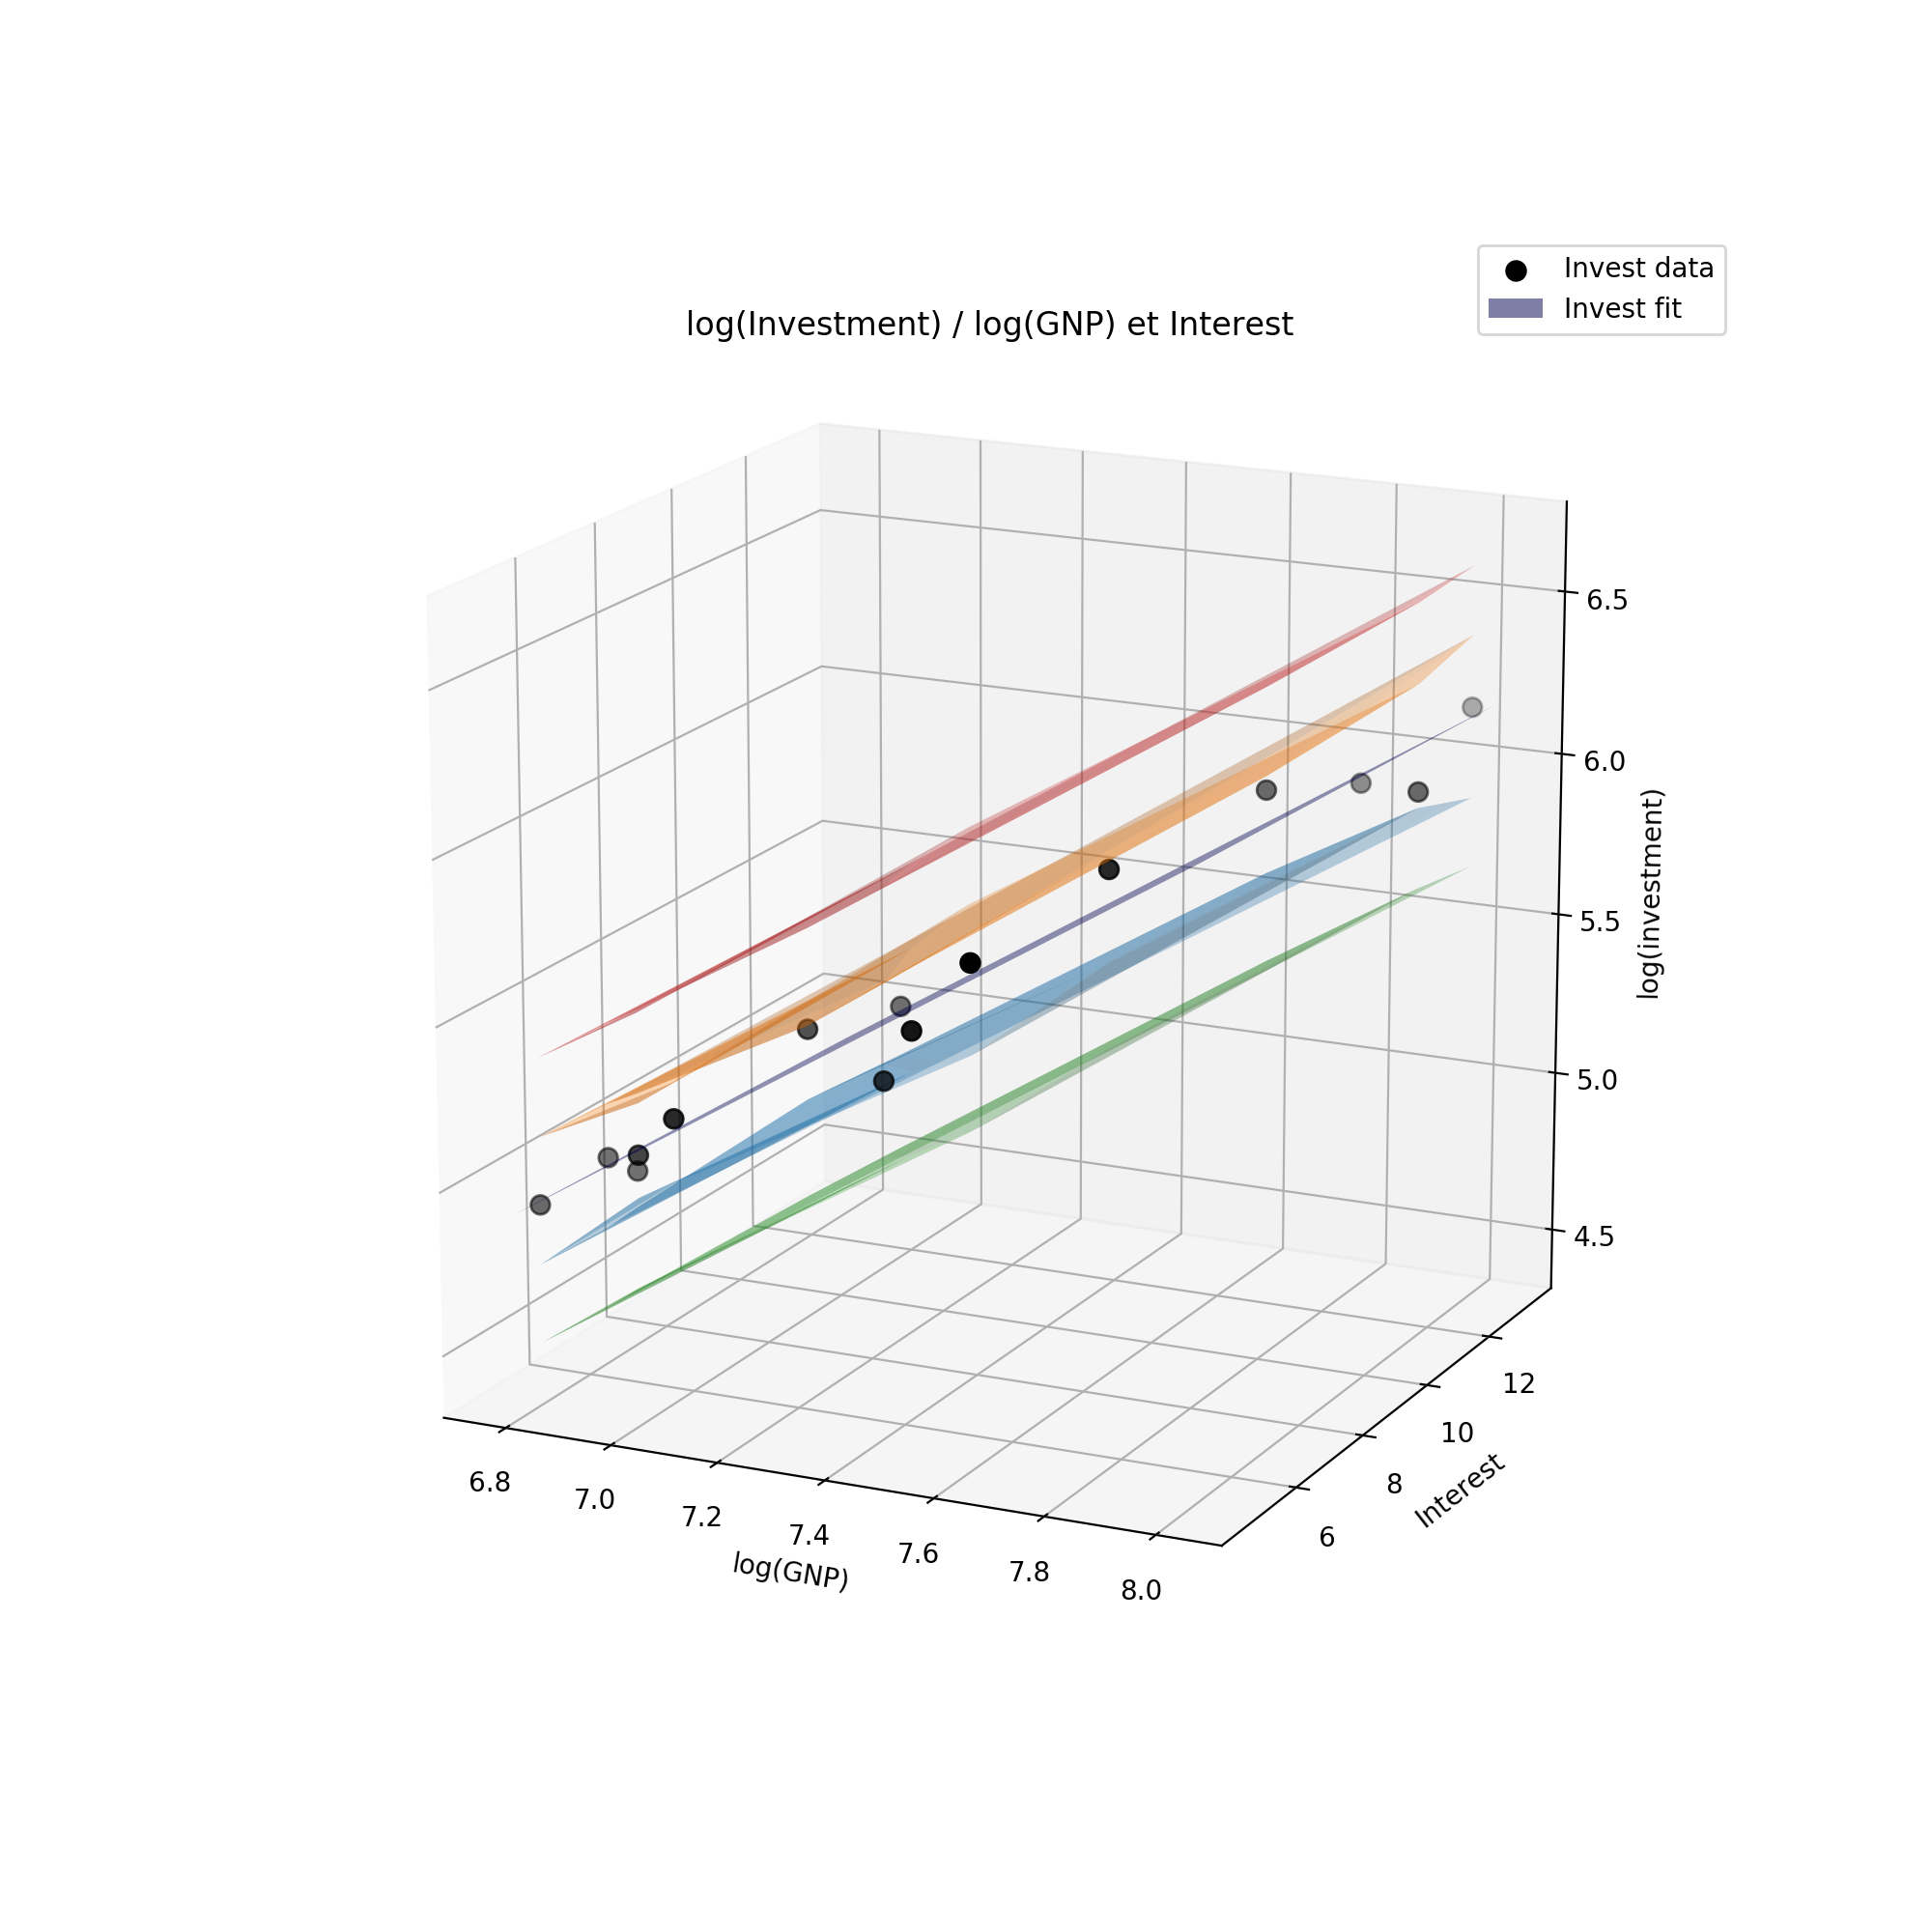

In [118]:
# Déclaration de la figure pour le graphique 3D
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111, projection='3d')

# On trace les points de données du dataset
ax.scatter(X_log,df['interest'], Y_log, label="Invest data", color='black', s=50 )

# Plan de prédiction : on détermine d'abord le maillage de la surface, ici 100 points
# entre le min et le max de chacun des axes
x_surf, y_surf = np.meshgrid(np.linspace(X_log.min(), X_log.max(), 100),\
                             np.linspace(df['interest'].min(), df['interest'].max(),100))
# On trace le plan
planPrédiction = ax.plot_surface(x_surf, y_surf, Beta[0] + Beta[1] * x_surf + Beta[2] * y_surf, \
                                 color="#000099", alpha=0.5, label='Invest fit',\
                                 linewidth=0, antialiased=True)

# hack officiel pour éviter un bug lié à l'affichage de la légende !
planPrédiction._facecolors2d=planPrédiction._facecolors3d
planPrédiction._edgecolors2d=planPrédiction._edgecolors3d

# On trace ensuite les 4 plans correspondant aux 4 vecteurs des bornes des intervalles
# On utilise la fonction plot_trisurf qui permet de spécifier un vecteur simple
# pour chacun des axes.
ax.plot_trisurf(X_log,df['interest'],df['infCI3D'], alpha=0.3)
ax.plot_trisurf(X_log,df['interest'],df['supCI3D'], alpha=0.3)
ax.plot_trisurf(X_log,df['interest'],df['infPI3D'], alpha=0.3)
ax.plot_trisurf(X_log,df['interest'],df['supPI3D'], alpha=0.3)

ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(investment)')
ax.set_title('log(Investment) / log(GNP) et Interest')
ax.legend()

### Commentaires
On retrouve les formes observées en 2D pour les intervalles de confiance et de prédiction qui deviennent des plans en 3D. L'intervalle de prédictio, est plus grand que l'intervalle de confiance car il tient compte du bruit dans les valeurs.

**Difficultés rencontrées**
-L'ajout de la légende pose problème et nécessite un hack pour la fonction plot_surf
-De même l'ajout de la légende sur la fonction plot_trisurf fait disparaître le graph et je n'ai pas réussi à résoudre ce problème.
-J'ai d'abord essayé d'utiliser la même fonction plot_surface pour tous les plans, mais celle-ci nécessite la mise au point délicate de meshgrid sur les données qui complexifie le code, tandis que la fonction plot_trisurf nécessite simplement de fournir 3 vecteurs simples, un pour chaque composante, ce qui est une solution plus élégante. J'ai néanmoins laissé le tracé du plan de régression avec plot_surface comme ça fonctionnait.

## Question 13
En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [119]:
# On utilise de nouveau le modèle de regression regr défini plus haut
# mais cette fois on lui demande de fitter la matrice
regr.fit(matX,Y_log)
print("Coefficients Beta SKleanr : Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(regr.intercept_, *regr.coef_[1:]))
print("Coefficents manuels       : Beta0 = {:f} Beta1 = {:f} Beta2 = {:f}".format(*Beta))

# Calcul du R2
R2_SKlearn = r2_score(y_pred=matX.dot(Beta), y_true=Y_log)
print("Coefficient R2 SKlearn = {:f}".format(R2_SKlearn))
print("Coefficient R2 manuel  = {:f}".format(R2))

InvestPredSKlearn = regr.predict([X1_1000_10])
print("Prédiction pour gnp=1000 et interest 10 avec SKlearn = {:f}".format(InvestPredSKlearn[0]))
print("Prédiction pour gnp=1000 et interest=10 manuelles    = {:f}".format(InvestPred))

Coefficients Beta SKleanr : Beta0 = -2.180455 Beta1 = 1.051243 Beta2 = -0.006529
Coefficents manuels       : Beta0 = -2.180455 Beta1 = 1.051243 Beta2 = -0.006529
Coefficient R2 SKlearn = 0.963311
Coefficient R2 manuel  = 0.963311
Prédiction pour gnp=1000 et interest 10 avec SKlearn = 5.015984
Prédiction pour gnp=1000 et interest=10 manuelles    = 5.015984


### Commentaire final
-On constante que tous les résultats obtenus avec la library Scikit-Learn sont **identiques** aux résultats obtenus par le calcul manuel... Ouf ;-)